In [15]:
from trajectree.sequence.swap import perform_swapping_simulation, create_swapping_simulation
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Set simulation params
def run_experiment(max_cache_nodes=-1):
    N = 4
    error_tolerance = 1e-13

    params = {
        "PA_det_eff": (0.04),
        "BSM_det_loss_1":  (0.045),
        "BSM_det_loss_2": (0.135),
        "BSM_dark_counts_1": 3e-5,
        "BSM_dark_counts_2": 3e-5,
        "alpha_list": np.array([np.pi/2]),
        "delta_list": np.array([np.pi/2]),
        "channel_loss": 1e-7,
        "chi": 0.0587, # 0.06, # 0.24,
        "BSM_meas": {0:(2,3), 1:(6,7)},

        "if_analyze_entanglement": True,
        "calc_fidelity": False,
        "damping_error": True,
        "depolarizing_error": False,
        "max_cache_nodes": max_cache_nodes
    }

    num_modes = 8
    # Create vacuum state
    
    # idler_angles = np.linspace(0, np.pi, 1)
    # signal_angles = np.linspace(0, 4*np.pi, 30)

    num_simulations = 1000 # 20

    cache_size = 10
    iter = 0
    max_iter = 1
    threshold = 1e-4
    times = []

    while iter < max_iter:        
        psi_same, t_eval_same = create_swapping_simulation(N, num_modes, params, cache_size, error_tolerance = 1e-10)


        # np.random.seed(iter)
        _, _, times_same = perform_swapping_simulation(psi_same, t_eval_same, num_simulations, verbose = False)
        times.append(times_same)
        
        iter += 1
        print("iter:", iter)

    times_avg = np.mean(np.array(times).T, axis = 1)

    avg_times = [np.mean(times_avg[:i]) for i in range(1, len(times_avg))]

    np.save(f"amortized_sample_complexity_{max_cache_nodes}.npy", avg_times)

    return t_eval_same
    # return times

In [21]:
for i in range(1):
    t_eval = run_experiment(max_cache_nodes=30)
    print(len(t_eval.cache_heap))

/home/asingal/home/Trajectree/trajectree/fock_optics/measurement.py:84: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  dense_op = sqrtm(create_threshold_POVM_OP_Dense(efficiency, outcome, N)).astype(np.complex128)


iter: 1
30


In [25]:
color_map = []
for node in t_eval.graph:
    print(node)
    if node in t_eval.cache_heap:
        print(node)
print(t_eval.cache_heap)
    # if node < 10:
    #     color_map.append('blue')
    # else: 
    #     color_map.append('green')


()
(0,)
(0, 0)
(0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 0, 0, 2)
(0, 0, 0, 0, 0, 1)
(0, 0, 0, 0, 0, 1, 0)
(0, 0, 0, 0, 0, 1, 0, 1)
(0, 0, 0, 0, 1)
(0, 0, 0, 0, 1, 0)
(0, 0, 0, 0, 1, 0, 1)
(0, 0, 0, 0, 1, 0, 1, 2)
(0, 0, 0, 0, 1, 0, 1, 0)
(0, 0, 0, 0, 0, 0, 1)
(0, 0, 0, 0, 0, 0, 1, 0)
(0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 1)
(0, 0, 1, 0)
(0, 0, 1, 0, 0)
(0, 0, 1, 0, 0, 1)
(0, 0, 1, 0, 0, 1, 1)
(0, 0, 1, 0, 0, 1, 1, 0)
(0, 0, 2)
(0, 0, 2, 0)
(0, 0, 2, 0, 0)
(0, 0, 2, 0, 0, 3)
(0, 0, 2, 0, 0, 3, 1)
(0, 0, 2, 0, 0, 3, 1, 0)
(0, 0, 0, 0, 1, 0, 2)
(0, 0, 0, 0, 1, 0, 2, 0)
(0, 1)
(0, 1, 0)
(0, 1, 0, 0)
(0, 1, 0, 0, 0)
(0, 1, 0, 0, 0, 1)
(0, 1, 0, 0, 0, 1, 1)
(0, 1, 0, 0, 0, 1, 1, 0)
(0, 0, 0, 1)
(0, 0, 0, 1, 0)
(0, 0, 0, 1, 0, 1)
(0, 0, 0, 1, 0, 1, 0)
(0, 0, 0, 1, 0, 1, 0, 2)
(0, 1, 0, 0, 0, 0)
(0, 1, 0, 0, 0, 0, 3)
(0, 1, 0, 0, 0, 0, 3, 0)
(0, 0, 0, 0, 0, 0, 2)
(0, 0, 0, 0, 0, 0, 2, 0)
(0, 0, 0, 0, 0, 3)
(0, 0, 0, 0, 0, 3, 0)
(0, 0, 0, 0, 0, 3

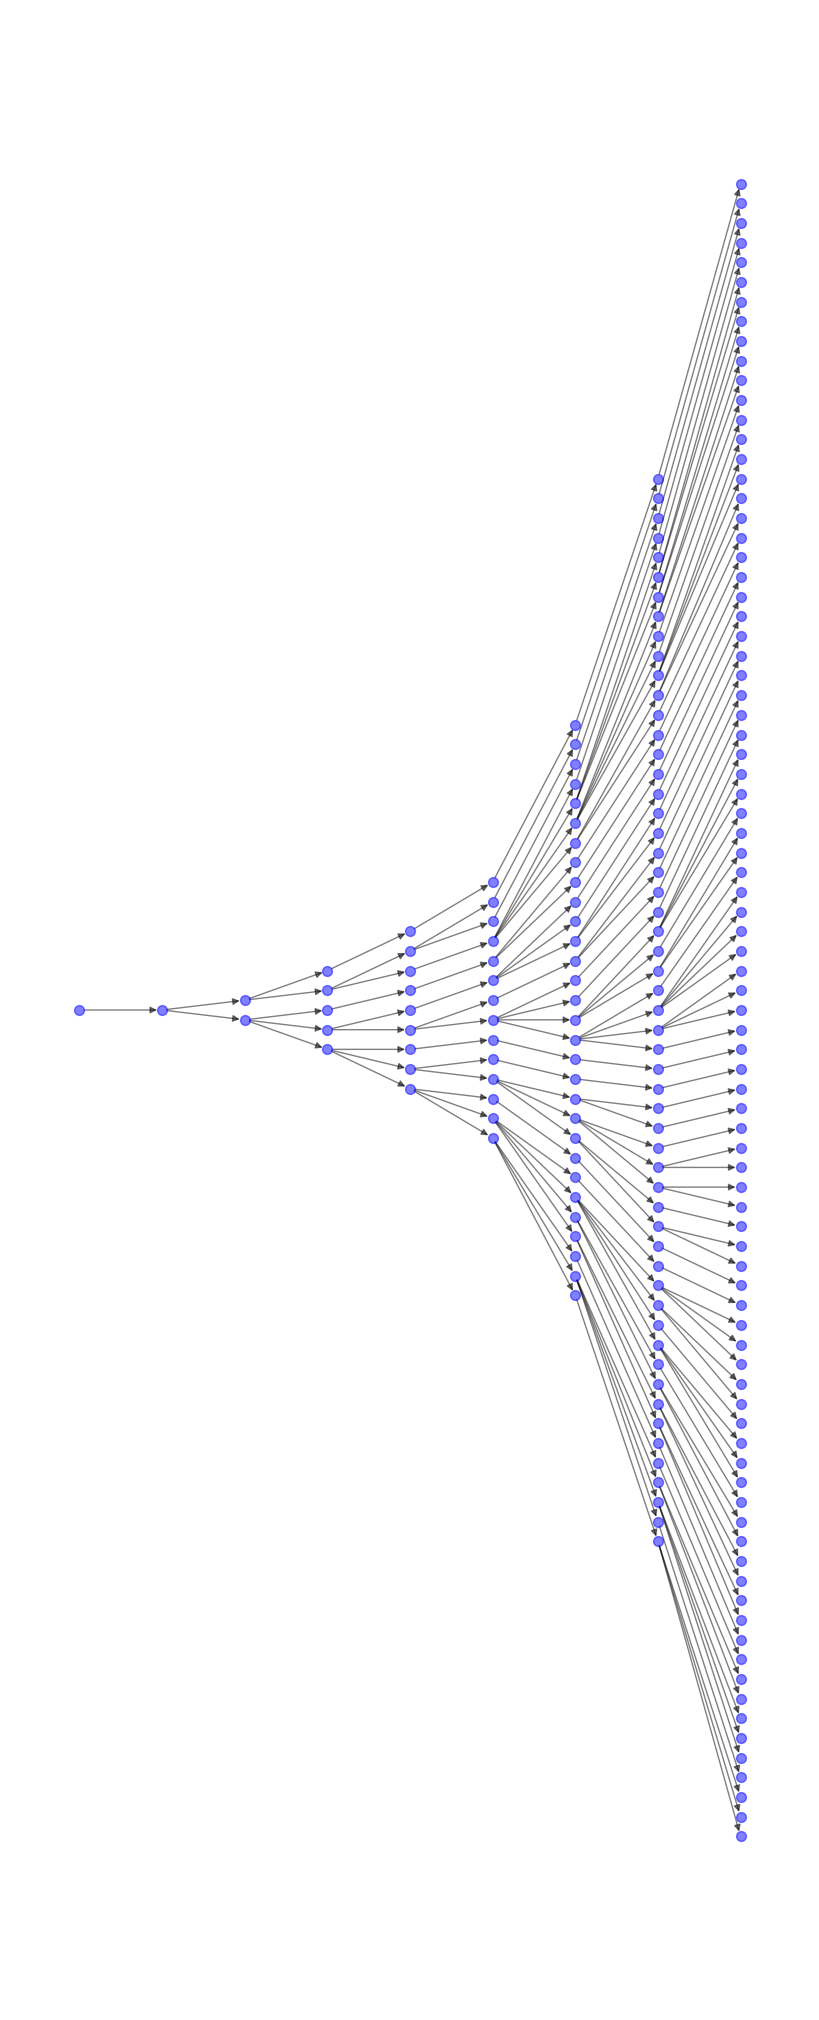

In [ ]:
import networkx as nx
t_eval.show_graph()

In [7]:
(227+217+250+220+219)/5

226.6

In [ ]:
run_experiment(max_cache_nodes=5)
run_experiment(max_cache_nodes=10)
run_experiment(max_cache_nodes=20)
run_experiment(max_cache_nodes=30)
run_experiment(max_cache_nodes=40)
run_experiment(max_cache_nodes=50)
run_experiment(max_cache_nodes=100)
run_experiment(max_cache_nodes=500)
run_experiment(max_cache_nodes=1000)

/home/asingal/home/Trajectree/trajectree/fock_optics/measurement.py:84: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  dense_op = sqrtm(create_threshold_POVM_OP_Dense(efficiency, outcome, N)).astype(np.complex128)


iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 1


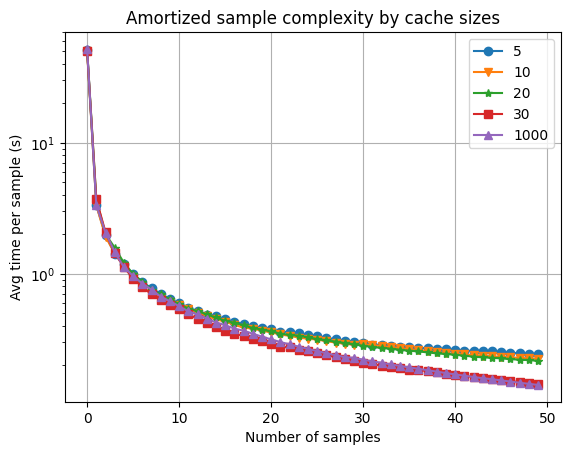

In [14]:
amortized_sample_complexity_10 = np.load("amortized_sample_complexity_10.npy").astype(np.float64)
amortized_sample_complexity_50 = np.load("amortized_sample_complexity_50.npy").astype(np.float64)
amortized_sample_complexity_100 = np.load("amortized_sample_complexity_100.npy").astype(np.float64)
amortized_sample_complexity_500 = np.load("amortized_sample_complexity_500.npy").astype(np.float64)
amortized_sample_complexity_1000 = np.load("amortized_sample_complexity_1000.npy").astype(np.float64)
amortized_sample_complexity_5 = np.load("amortized_sample_complexity_5.npy").astype(np.float64)
amortized_sample_complexity_20 = np.load("amortized_sample_complexity_20.npy").astype(np.float64)
amortized_sample_complexity_30 = np.load("amortized_sample_complexity_30.npy").astype(np.float64)
amortized_sample_complexity_40 = np.load("amortized_sample_complexity_40.npy").astype(np.float64)

linewidth = 5
step = 20

plt.plot(amortized_sample_complexity_5[::step], marker = 'o',  label = "5")
plt.plot(amortized_sample_complexity_10[::step], marker = 'v',  label = "10")
plt.plot(amortized_sample_complexity_20[::step], marker = '*',  label = "20")
plt.plot(amortized_sample_complexity_30[::step], marker = 's',  label = "30")
# plt.plot(amortized_sample_complexity_40[::step], marker = 'x',  label = "40")
# plt.plot(amortized_sample_complexity_50[::step], marker = 'D',  label = "50")
# plt.plot(amortized_sample_complexity_100[::step], marker = '.',  label = "100")
# plt.plot(amortized_sample_complexity_500[::step], marker = '<',  label = "500")
plt.plot(amortized_sample_complexity_1000[::step], marker = '^',  label = "1000")

plt.grid()
plt.yscale('log')
plt.title("Amortized sample complexity by cache sizes")
plt.ylabel("Avg time per sample (s)")
plt.xlabel("Number of samples")
plt.legend()

In [ ]:
times = run_experiment()

Text(0.5, 0, 'Number of samples')

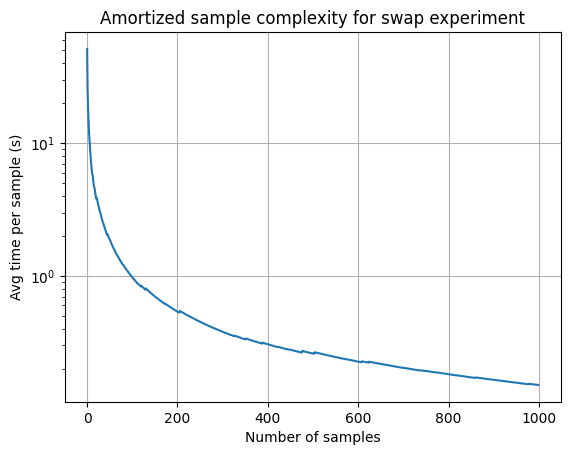

In [6]:
times_avg = np.mean(np.array(times).T, axis = 1)

amortized_sample_complexity = [np.mean(times_avg[:i]) for i in range(1, len(times_avg))]

plt.plot(amortized_sample_complexity)
plt.grid()
plt.yscale('log')
plt.title("Amortized sample complexity for swap experiment")
plt.ylabel("Avg time per sample (s)")
plt.xlabel("Number of samples")

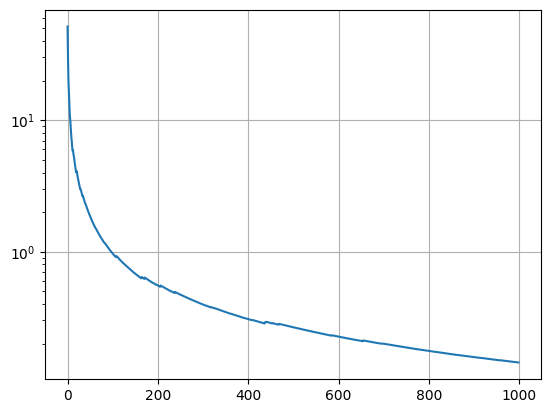

In [ ]:
times_avg = np.mean(np.array(times).T, axis = 1)

avg_times = [np.mean(times_avg[:i]) for i in range(1, len(times_avg))]

np.save("amortized_sample_complexity.npy", avg_times)


Text(0.5, 0, 'Number of samples')

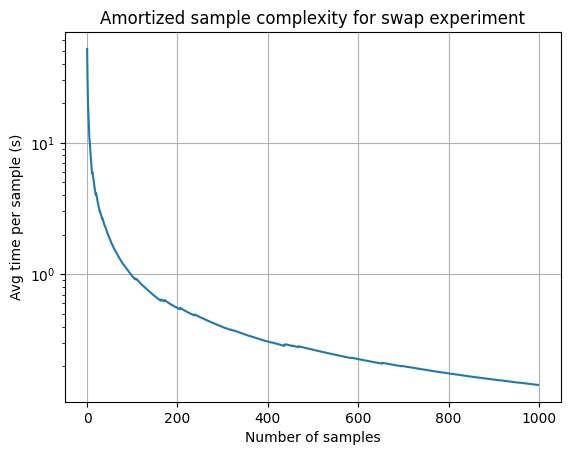

In [3]:
amortized_sample_complexity = np.load("amortized_sample_complexity.npy").astype(np.float64)

plt.plot(amortized_sample_complexity)
plt.grid()
plt.yscale('log')
plt.title("Amortized sample complexity for swap experiment")
plt.ylabel("Avg time per sample (s)")
plt.xlabel("Number of samples")

In [15]:
import numpy as np
np.sinh(0.24)**2

np.asinh(np.sqrt(0.0587))

np.float64(0.23997102262450593)

First, we compare the amount of time required to perform the two simulations with and without caches. 

In [ ]:
import time
# Set simulation params
N = 3
error_tolerance = 1e-7

params = {
    "PA_det_eff": 0.96,
    "BSM_det_loss_1":  0.045,
    "BSM_det_loss_2": 0.135,
    "BSM_dark_counts_1": 1,
    "BSM_dark_counts_2": 1,
    "alpha_list": np.array([np.pi/2]),
    "delta_list": np.array([np.pi/2]),
    "channel_loss": 1e-5,
    "chi": 0.24,
    "BSM_meas": {0:(2,3), 1:(6,7)},

    "if_analyze_entanglement": True,
    "calc_fidelity": False,
}

num_modes = 8

num_simulations = 100 # 20

cache_sizes = [6]

probs = 0

params["BSM_dark_counts_1"] = 1+1e-3
params["BSM_dark_counts_2"] = 1+1e-3
params["chi"] = 0.24

params["alpha_list"] = np.array([np.pi/2])

start_time = time.time()
fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance, cache = True)
elapsed_time_cache = time.time() - start_time
print("probabilities:", probabilities)
probs += np.mean(probabilities)

print(probs, "elapsed_time:", elapsed_time_cache)

/home/asingal/home/Trajectree/trajectree/fock_optics/measurement.py:84: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  dense_op = sqrtm(create_threshold_POVM_OP_Dense(efficiency, outcome, N)).astype(np.complex128)


operation: fiber_attenuation formalism: kraus traversed nodes: ()
next operation:
operation: fiber_attenuation formalism: kraus traversed nodes: (0,)
next operation:
operation: beam splitter formalism: closed traversed nodes: (0, 0)
next operation:
operation: beam splitter formalism: closed traversed nodes: (0, 0)
next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0)
next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed tr

/home/asingal/home/.venv/lib/python3.12/site-packages/quimb/tensor/tensor_1d.py:1868: RuntimeWarning: divide by zero encountered in divide
  self[insert].modify(data=self[insert].data / norm**0.5)
/home/asingal/home/.venv/lib/python3.12/site-packages/quimb/tensor/tensor_1d.py:1868: RuntimeWarning: invalid value encountered in divide
  self[insert].modify(data=self[insert].data / norm**0.5)


next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0, 3)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 3, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 3, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: quantum_channel formalism: closed traversed nodes: (0,

In [ ]:
import time
# Set simulation params
N = 3
error_tolerance = 1e-7

params = {
    "PA_det_eff": 0.96,
    "BSM_det_loss_1":  0.045,
    "BSM_det_loss_2": 0.135,
    "BSM_dark_counts_1": 1,
    "BSM_dark_counts_2": 1,
    "alpha_list": np.array([np.pi/2]),
    "delta_list": np.array([np.pi/2]),
    "channel_loss": 1e-5,
    "chi": 0.24,
    "BSM_meas": {0:(2,3), 1:(6,7)},

    "if_analyze_entanglement": True,
    "calc_fidelity": False,
}

num_modes = 8

num_simulations = 100 # 20

cache_sizes = [6]

probs = 0

params["BSM_dark_counts_1"] = 1+1e-3
params["BSM_dark_counts_2"] = 1+1e-3
params["chi"] = 0.24

params["alpha_list"] = np.array([np.pi/2])

start_time = time.time()
fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance, cache = False)
elapsed_time = time.time() - start_time
print("probabilities:", probabilities)
probs += np.mean(probabilities)

print(probs, "elapsed_time:", elapsed_time)

/home/asingal/home/Trajectree/trajectree/fock_optics/measurement.py:84: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  dense_op = sqrtm(create_threshold_POVM_OP_Dense(efficiency, outcome, N)).astype(np.complex128)


operation: fiber_attenuation formalism: kraus traversed nodes: ()
next operation:
operation: fiber_attenuation formalism: kraus traversed nodes: (0,)
next operation:
operation: beam splitter formalism: closed traversed nodes: (0, 0)
operation: beam splitter formalism: closed traversed nodes: (0, 0)
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0)
next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 1)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 1, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 1, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 1, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 1, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 1, 0, 0)
operation: quantum_channel formalism: closed t

/home/asingal/home/.venv/lib/python3.12/site-packages/quimb/tensor/tensor_1d.py:1868: RuntimeWarning: divide by zero encountered in divide
  self[insert].modify(data=self[insert].data / norm**0.5)
/home/asingal/home/.venv/lib/python3.12/site-packages/quimb/tensor/tensor_1d.py:1868: RuntimeWarning: invalid value encountered in divide
  self[insert].modify(data=self[insert].data / norm**0.5)


operation: detector inefficiency formalism: kraus traversed nodes: (0, 0)
next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: quantum_cha

In [ ]:
print("uncached duration:", elapsed_time)
print("cached duration:", elapsed_time_cache)

uncached duration: 450.85637307167053
cached duration: 22.887506008148193


[np.complex128(0.977770303059756+0j), np.complex128(0.3635833163601106+0j), np.complex128(0.9391233953819681+0j), np.complex128(0.9156392983062481+0j), np.complex128(0.9002109315831314+0j), np.complex128(0.892992563105959+0j), np.complex128(0.9072312128922677+0j), np.complex128(0.8551278034181193+0j), np.complex128(0.8710909813093152+0j), np.complex128(0.8442223789199248+0j)]
()
└── (0,)
    └── (0, 0)
        ├── (0, 0, 0)
        │   ├── (0, 0, 0, 0)
        │   │   └── (0, 0, 0, 0, 0)
        │   ├── (0, 0, 0, 1)
        │   │   └── (0, 0, 0, 1, 0)
        │   ├── (0, 0, 0, 2)
        │   │   └── (0, 0, 0, 2, 0)
        │   └── (0, 0, 0, 3)
        │       └── (0, 0, 0, 3, 0)
        ├── (0, 0, 1)
        │   ├── (0, 0, 1, 0)
        │   │   └── (0, 0, 1, 0, 0)
        │   ├── (0, 0, 1, 1)
        │   │   └── (0, 0, 1, 1, 0)
        │   ├── (0, 0, 1, 2)
        │   │   └── (0, 0, 1, 2, 0)
        │   └── (0, 0, 1, 3)
        │       └── (0, 0, 1, 3, 0)
        ├── (0, 0, 2)
        

/home/asingal/home/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/asingal/home/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


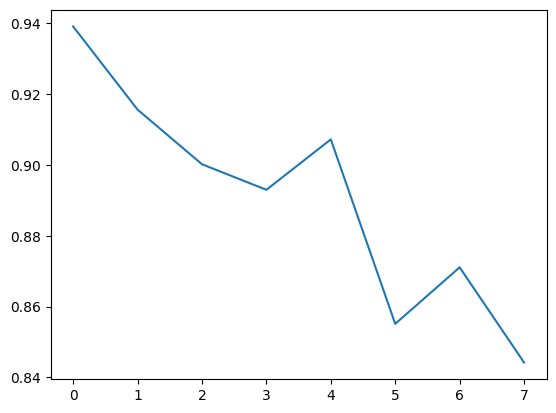

In [ ]:
plt.plot(visibilities[2:])
print(visibilities)
print(t_eval.graph)

np.save("visibilities.npy", visibilities)

/tmp/ipykernel_4068623/4031899224.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  read_visibilities = np.load("visibilities.npy").astype(np.float64)


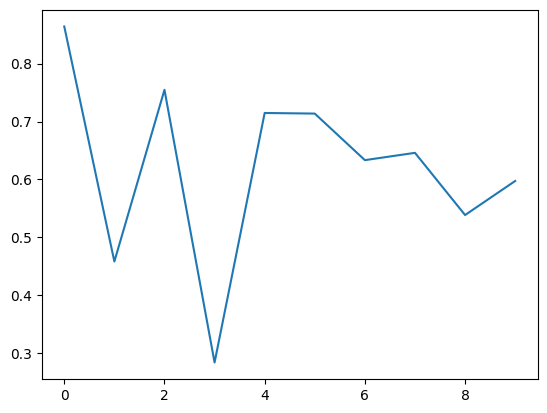

In [ ]:
read_visibilities = np.load("visibilities.npy").astype(np.float64)
plt.plot(read_visibilities)

/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  G.add_edge(node.bpointer, node.identifier)
/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  G.add_edge(node.bpointer, node.identifier)
/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  G.add_edge(node.bpointer, node.identifier)
/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  G.add_edge(node.bpointer, node.identifier)
/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  G.add_edge(node.bpointer, node.identifier)
/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node

Graphviz not found. Using a default, potentially non-hierarchical layout.


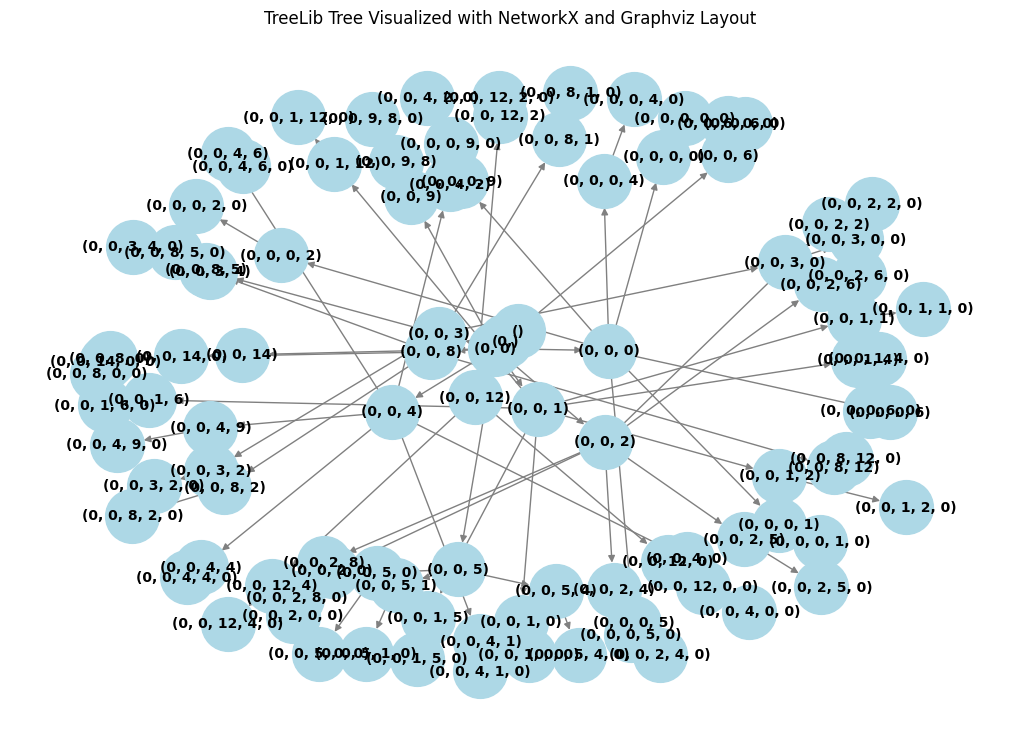

In [ ]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
def display_treelib_with_networkx(tree):
    """
    Converts a treelib Tree object to a networkx DiGraph and displays it.
    """
    # Create an empty directed graph in networkx
    G = nx.DiGraph()

    # Iterate through the treelib tree to add nodes and edges
    # We use tree.all_nodes() to get every node
    for node in tree.all_nodes():
        G.add_node(node.identifier, label=node.tag) # Add node with its tag as a label attribute
        if node.identifier != tree.root:
            # Add an edge from the parent to the current node
            G.add_edge(node.bpointer, node.identifier)

    # Use graphviz_layout for a proper hierarchical tree layout
    # The 'prog="dot"' option ensures a top-down hierarchical flow
    try:
        pos = graphviz_layout(G, prog="dot")
    except ImportError:
        # Fallback if pydot or graphviz is not correctly installed/configured
        print("Graphviz not found. Using a default, potentially non-hierarchical layout.")
        pos = nx.spring_layout(G)

    # Draw the graph
    plt.figure(figsize=(10, 7))
    # 'labels' uses the 'label' attribute we added to the nodes
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
            node_color='lightblue', node_size=1500, edge_color='gray', arrows=True,
            font_size=10, font_weight='bold')
    plt.title("TreeLib Tree Visualized with NetworkX and Graphviz Layout")
    plt.axis('off') # Hide the axis
    plt.show()

display_treelib_with_networkx(t_eval.graph)

In [ ]:
for i in [1e-3]: # np.linspace(0.1, 0.5, 5):
    params["alpha_list"] = np.array([3*np.pi/2])

    fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
    print("probabilities:", probabilities)
    print("fidelities:", fidelities)
    prob_diff_phase += np.mean(probabilities)

    visibilities.append((prob_same_phase - prob_diff_phase) / (prob_same_phase + prob_diff_phase))
# params["BSM_meas"] = {1:(2,3), 0:(6,7)}

# fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
# prob_diff_phase += np.mean(probabilities)

# params["alpha_list"] = np.array([np.pi/2])

# fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
# prob_same_phase += np.mean(probabilities)

operation: fiber_attenuation formalism: kraus traversed nodes: ()
next operation:
operation: fiber_attenuation formalism: kraus traversed nodes: (0,)
next operation:
operation: beam splitter formalism: closed traversed nodes: (0, 0)
next operation:
operation: beam splitter formalism: closed traversed nodes: (0, 0)
next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0)


SystemError: CPUDispatcher(<function svd_truncated_numba at 0x729044daf880>) returned a result with an exception set

In [ ]:
from trajectree.fock_optics.utils import create_bimode_bell_state, outer_product_mps
from trajectree.fock_optics.outputs import read_quantum_state
read_quantum_state(create_bimode_bell_state("psi_minus", N, error_tolerance = 1e-12), N)



Corresponding Basis terms:
0H0V_D 0H0V_C 1H0V_B 0H1V_A - 12 - [0.70710678+0.j]
0H0V_D 0H0V_C 0H1V_B 1H0V_A - 28 - [-0.70710678+0.j]


In [ ]:
(prob_same_phase - prob_diff_phase) / (prob_same_phase + prob_diff_phase)

np.float64(0.9940825533144946)